# EDA – Dataset de Vuelos (Planes)
*Exploratory Data Analysis & visual storytelling*

Este análisis se basa en un dataset de la plataforma *DataCamp*,
al cual se le incorporaron procesos adicionales de limpieza,
feature engineering y visualización para profundizar el estudio más allá de los ejercicios originales.

## 1. Introducción
Este notebook realiza un EDA del dataset de vuelos comerciales ("planes") con registros de 2019 (India). Incluye variables como aerolínea, origen/destino, ruta, fecha y horario, duración, cantidad de escalas y precio.

**Objetivo:** explorar la estructura de los datos y entender patrones de precios y duración según aerolínea, escalas, rutas y tiempo (fechas/horarios), detectar outliers y preparar insumos visuales y métricas descriptivas que sirvan para futuros modelos o análisis de negocio.

## 2. Carga de datos y exploración inicial

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
planes = pd.read_csv("data/planes.csv")
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


In [3]:
planes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10660 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10233 non-null  object 
 1   Date_of_Journey  10338 non-null  object 
 2   Source           10473 non-null  object 
 3   Destination      10313 non-null  object 
 4   Route            10404 non-null  object 
 5   Dep_Time         10400 non-null  object 
 6   Arrival_Time     10466 non-null  object 
 7   Duration         10446 non-null  object 
 8   Total_Stops      10448 non-null  object 
 9   Additional_Info  10071 non-null  object 
 10  Price            10044 non-null  float64
dtypes: float64(1), object(10)
memory usage: 916.2+ KB


In [4]:
planes.describe()

,Price
count,10044.000000
mean,9044.411191
std,4472.304869
min,1759.000000
25%,5276.750000
50%,8366.000000
75%,12373.000000
max,54826.000000


In [5]:
planes.shape

(10660, 11)

In [6]:
planes.describe(include="all")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10233,10338,10473,10313,10404,10400,10466,10446,10448,10071,10044.000000
unique,8,44,5,6,126,221,1334,367,5,10,NaN
top,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3685,492,4451,4391,2317,224,417,532,5503,7867,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9044.411191
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4472.304869
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5276.750000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8366.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [7]:
# Se verifica si existen filas duplicadas en el DataFrame,
# ya que la duplicación puede distorsionar estadísticas y visualizaciones.
print("Cantidad de filas duplicadas:", planes.duplicated().sum())

Cantidad de filas duplicadas: 134


## 3. Limpieza y preparación

In [8]:
# Se eliminan las filas duplicadas detectadas en la exploración inicial (139 en total),
# ya que no aportan información nueva y pueden distorsionar los resultados del análisis.
planes = planes.drop_duplicates().reset_index(drop=True)

print("Cantidad de filas duplicadas:", planes.duplicated().sum())
print("Cantidad de filas después de eliminar duplicados:", planes.shape[0])

Cantidad de filas duplicadas: 0
Cantidad de filas después de eliminar duplicados: 10526


In [9]:
# Valores perdidos
print(planes.isna().sum())

Airline            427
Date_of_Journey    316
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              615
dtype: int64


In [10]:
 # Se calcula a cuántas observaciones equivale el 5% del DataFrame planes.
umbral = len(planes) * 0.05
print(umbral)

526.3000000000001


In [11]:
# Se crea un filtro: si una columna tiene más de 533 valores faltantes, entonces no la vamos a limpiar con este método (porque perderíamos demasiados datos).
cols_to_drop = planes.columns[planes.isna().sum() <= umbral]

# Se eliminan los valores faltantes de las columnas por debajo del umbral
planes.dropna(subset=cols_to_drop, inplace=True)

print(planes.isna().sum())

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64


In [12]:
# Las columnas "Additional_Info" y "Price" continúan presentando valores faltantes, 300 y 368 respectivamente.
# Todas las demás columnas quedaron sin valores nulos (porque se borraron las filas con esos NaN).
# Pero las columnas Additional_Info (300 nulos) y Price (368 nulos) siguen teniendo valores faltantes, porque superaban el umbral (533) y quedaron fuera del filtro.

In [13]:
# Observamos qué valores contiene la columna "Additional_Info"
print(planes["Additional_Info"].value_counts())

Additional_Info
No info                         6299
In-flight meal not included     1499
No check-in baggage included     256
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64


In [14]:
#La columna "Additional_Info" fue eliminada porque combina alta proporción de valores irrelevantes (“No info”), categorías residuales y valores faltantes.
# Esto la convierte en una variable con bajo poder explicativo y con un costo de procesamiento innecesario para el análisis o modelado.
planes.drop("Additional_Info", axis=1, inplace=True)

In [15]:
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,11087.0


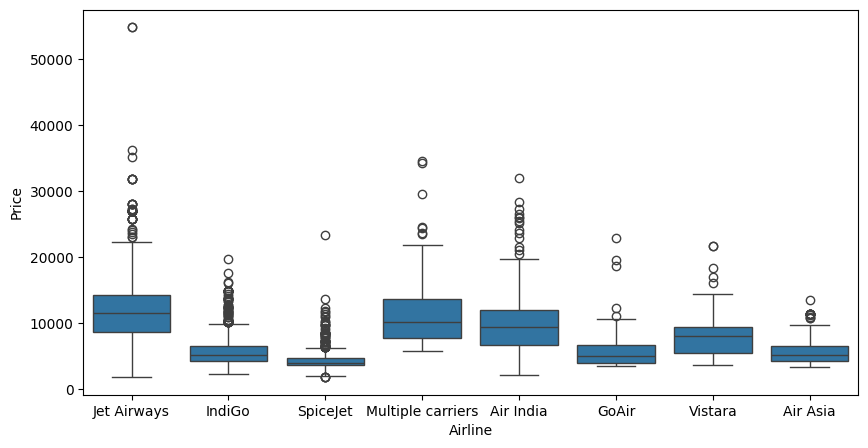

In [16]:
# Exploración de "Price" por aerolínea:
# El boxplot muestra alta dispersión y muchos outliers (puntos fuera de los “bigotes” = 1.5*IQR).

# Se observan medianas distintas por aerolínea (p.ej., Jet Airways alto; SpiceJet/Air Asia bajos).
# Para evitar sesgos por outliers, imputamos nulos de Price con la MEDIANA por aerolínea.

plt.figure(figsize=(10, 5))
sns.boxplot(data=planes, x="Airline", y="Price")
plt.show()

In [17]:
# Se agrupa por aerolínea y se calcula la mediana de "Price"
airline_prices = planes.groupby("Airline")["Price"].median()

print(airline_prices)

Airline
Air Asia              5192.0
Air India             9343.5
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11461.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8056.5
Name: Price, dtype: float64


In [18]:
# Se convierte en diccionario la mediana de "Price" por aerolínea
prices_dict = planes.groupby("Airline")["Price"].median().to_dict()
print(prices_dict)

{'Air Asia': 5192.0, 'Air India': 9343.5, 'GoAir': 5003.5, 'IndiGo': 5054.0, 'Jet Airways': 11461.0, 'Multiple carriers': 10197.0, 'SpiceJet': 3873.0, 'Vistara': 8056.5}


In [19]:
# Se reemplaza NaN de "Price" con la mediana correspondiente a su Airline (map + fillna).
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

In [20]:
# Se verifica que no queden valores faltantes.
print(planes.isna().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64


In [21]:
# Se crea una nueva columna convirtiendo 'Date_of_Journey' a tipo datetime,
# y a partir de ella se derivan variables de día, mes y día de la semana.

planes["Date_of_Journey"] = pd.to_datetime(planes["Date_of_Journey"], format="%d/%m/%Y")
planes["Journey_day"] = planes["Date_of_Journey"].dt.day
planes["Journey_month"] = planes["Date_of_Journey"].dt.month
planes["Journey_weekday"] = planes["Date_of_Journey"].dt.day_name()

In [22]:
# Se crean nuevas columnas a partir de 'Dep_Time' y 'Arrival_Time'.
# En 'Arrival_Time' algunas filas incluyen también día y mes, por lo que se recorta a HH:MM.
# Luego se convierten a formato datetime y se extraen las horas de salida y llegada.

planes["Dep_Time"] = pd.to_datetime(planes["Dep_Time"], format="%H:%M")

planes["Arrival_Time"] = planes["Arrival_Time"].str[:5]
planes["Arrival_Time"] = pd.to_datetime(planes["Arrival_Time"], format="%H:%M")

planes["Dep_hour"] = planes["Dep_Time"].dt.hour
planes["Arrival_hour"] = planes["Arrival_Time"].dt.hour

In [23]:
# La columna 'Duration' está en formato string (ej. '2h 50m', '3h', '45m'),
# lo que dificulta el análisis numérico.
# Para poder calcular estadísticas y realizar visualizaciones más precisas,
# se implementa una función que convierte estas duraciones en minutos totales.
# De este modo se obtiene una variable numérica 'Duration_minutes' lista para el análisis.

def convertir_duracion_simple(x):
    """
    Convierte un valor de duración expresado como string (ej. '2h 50m', '3h', '45m')
    en un número entero de minutos.

    Reglas:
    - Si el string incluye horas (ej. '2h 50m'), multiplica las horas por 60 y suma los minutos.
    - Si incluye solo horas (ej. '3h'), devuelve horas*60.
    - Si incluye solo minutos (ej. '45m'), devuelve esos minutos.
    - Si el valor no incluye 'h' ni 'm', devuelve 0.

    Parámetros
    ----------
    x : str
        Texto con la duración (formato 'Xh Ym', 'Xh', o 'Ym').

    Retorna
    -------
    int
        Duración total en minutos.
    """
    h, m = 0, 0
    if "h" in x:
        partes = x.split("h")
        h = int(partes[0].strip())
        if "m" in partes[1]:
            m = int(partes[1].replace("m", "").strip() or 0)
    elif "m" in x:
        m = int(x.replace("m", "").strip())
    return h * 60 + m


# Se crea la nueva columna con duración en minutos
planes["Duration_minutes"] = planes["Duration"].apply(convertir_duracion_simple)

In [24]:
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month,Journey_weekday,Dep_hour,Arrival_hour,Duration_minutes
0,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,1900-01-01 04:25:00,19h,2 stops,13882.0,9,6,Sunday,9,4,1140
1,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,1900-01-01 23:30:00,5h 25m,1 stop,6218.0,12,5,Sunday,18,23,325
2,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,1900-01-01 21:35:00,4h 45m,1 stop,13302.0,1,3,Friday,16,21,285
3,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,1900-01-01 09:00:00,1900-01-01 11:25:00,2h 25m,non-stop,3873.0,24,6,Monday,9,11,145
4,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,1900-01-01 18:55:00,1900-01-01 10:25:00,15h 30m,1 stop,11087.0,12,3,Tuesday,18,10,930


In [25]:
# Se normalizan las categorías de 'Total_Stops',
# transformando los valores textuales en variables numéricas.

stops_map = {
    "non-stop": 0,
    "1 stop": 1,
    "2 stops": 2,
    "3 stops": 3,
    "4 stops": 4
}

planes["Total_Stops_num"] = planes["Total_Stops"].map(stops_map)
planes[["Total_Stops", "Total_Stops_num"]].head()

,Total_Stops,Total_Stops_num
0,2 stops,2
1,1 stop,1
2,1 stop,1
3,non-stop,0
4,1 stop,1


In [26]:
# Se crea una nueva columna con categorías de duración:
# - Short-haul: menos de 300 min (< 5 h)
# - Medium-haul: 300 a 599 min (5–10 h)
# - Long-haul: 600 a 899 min (10–16 h)
# - Extreme: 900 min o más (≥ 15 h)

def categorize_duration(duration):
    if duration < 300:
        return "Short-haul"
    elif 300 <= duration < 600:
        return "Medium-haul"
    elif 600 <= duration < 960:
        return "Long-haul"
    else:
        return "Extreme duration"

planes["Duration_category"] = planes["Duration_minutes"].apply(categorize_duration)

In [27]:
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month,Journey_weekday,Dep_hour,Arrival_hour,Duration_minutes,Total_Stops_num,Duration_category
0,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,1900-01-01 04:25:00,19h,2 stops,13882.0,9,6,Sunday,9,4,1140,2,Extreme duration
1,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,1900-01-01 23:30:00,5h 25m,1 stop,6218.0,12,5,Sunday,18,23,325,1,Medium-haul
2,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,1900-01-01 21:35:00,4h 45m,1 stop,13302.0,1,3,Friday,16,21,285,1,Short-haul
3,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,1900-01-01 09:00:00,1900-01-01 11:25:00,2h 25m,non-stop,3873.0,24,6,Monday,9,11,145,0,Short-haul
4,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,1900-01-01 18:55:00,1900-01-01 10:25:00,15h 30m,1 stop,11087.0,12,3,Tuesday,18,10,930,1,Long-haul


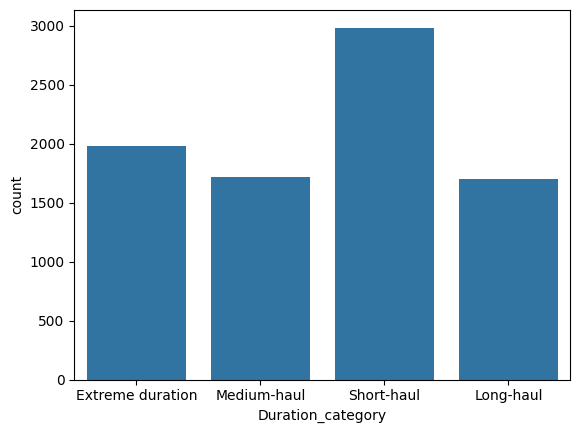

In [28]:
# Plot the counts of each category
sns.countplot(data=planes, x="Duration_category")
plt.show()

## 4. EDA univariado
En esta sección se exploran las distribuciones de las variables, tanto numéricas como categóricas,
con el objetivo de identificar patrones, detectar valores atípicos y obtener un panorama inicial
del comportamiento de los datos.

### 4.1 Variables numéricas
- Distribución de `Price`
- Distribución de `Duration_minutes`
- Distribución de `Total_Stops_num`

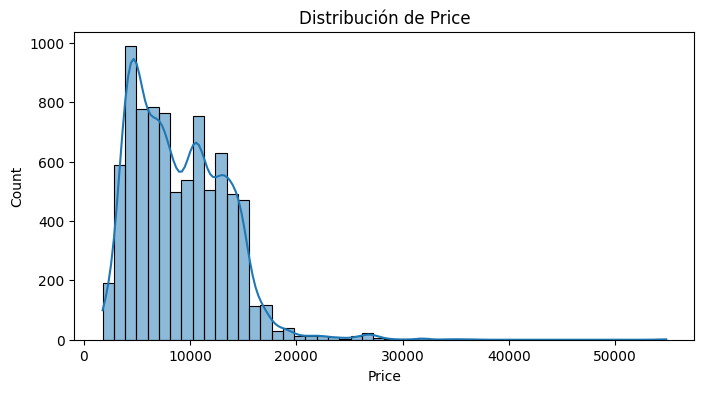

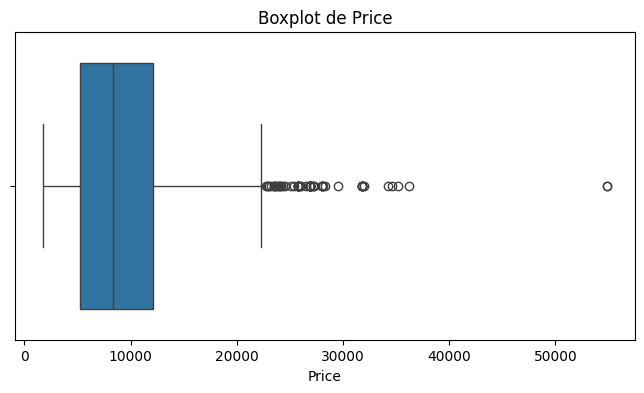

In [29]:
# Se grafica la distribución de Price.
# El histograma muestra la concentración de precios entre 5.000 y 15.000,
# aunque existen valores más altos (outliers).
plt.figure(figsize=(8,4))
sns.histplot(data=planes, x="Price", bins=50, kde=True)
plt.title("Distribución de Price")
plt.show()

# El boxplot confirma la presencia de muchos outliers en Price,
# que comienzan a observarse desde valores cercanos a 20.000 en adelante.
plt.figure(figsize=(8,4))
sns.boxplot(data=planes, x="Price")
plt.title("Boxplot de Price")
plt.show()

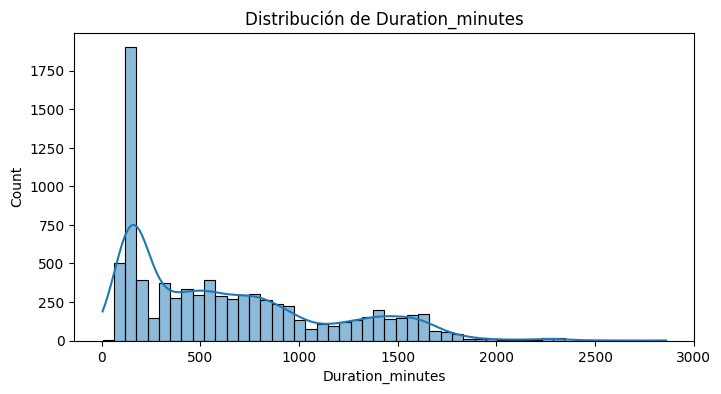

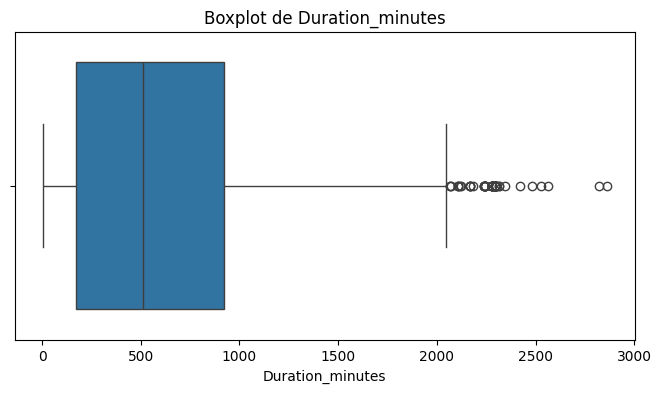

In [30]:
# Se grafica la distribución de Duration_minutes.
# La mayor parte de los vuelos dura menos de 300 minutos (5 horas),
# con un pico muy marcado en vuelos cortos (~1 a 2 horas).
# A partir de ahí, la frecuencia disminuye progresivamente,
# aunque existen vuelos largos y casos extremos que superan las 30 horas (> 1800 minutos).
plt.figure(figsize=(8,4))
sns.histplot(data=planes, x="Duration_minutes", bins=50, kde=True)
plt.title("Distribución de Duration_minutes")
plt.show()

# El boxplot de Duration_minutes confirma asimetría y outliers en vuelos muy largos.
plt.figure(figsize=(8,4))
sns.boxplot(data=planes, x="Duration_minutes")
plt.title("Boxplot de Duration_minutes")
plt.show()

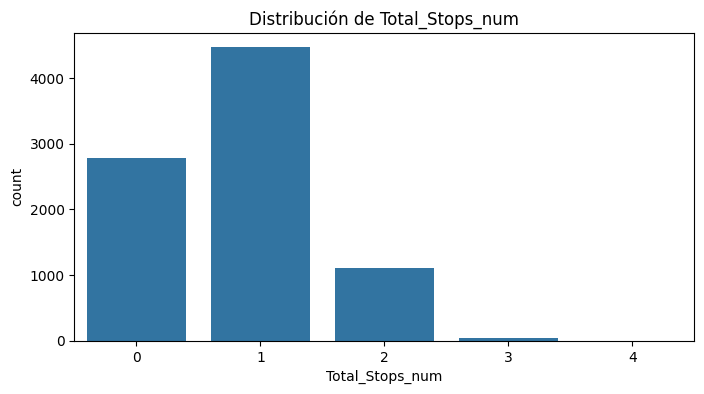

In [31]:
# Se grafica la distribución de Total_Stops_num.
# Predominan los vuelos con 1 escala, seguidos por vuelos sin escalas y con 2 escalas.
plt.figure(figsize=(8,4))
sns.countplot(data=planes, x="Total_Stops_num")
plt.title("Distribución de Total_Stops_num")
plt.show()

### 4.2 Variables categóricas
- Frecuencia de aerolíneas (`Airline`)
- Origen y destino (`Source`, `Destination`)
- Categorías de duración (`Duration_category`)

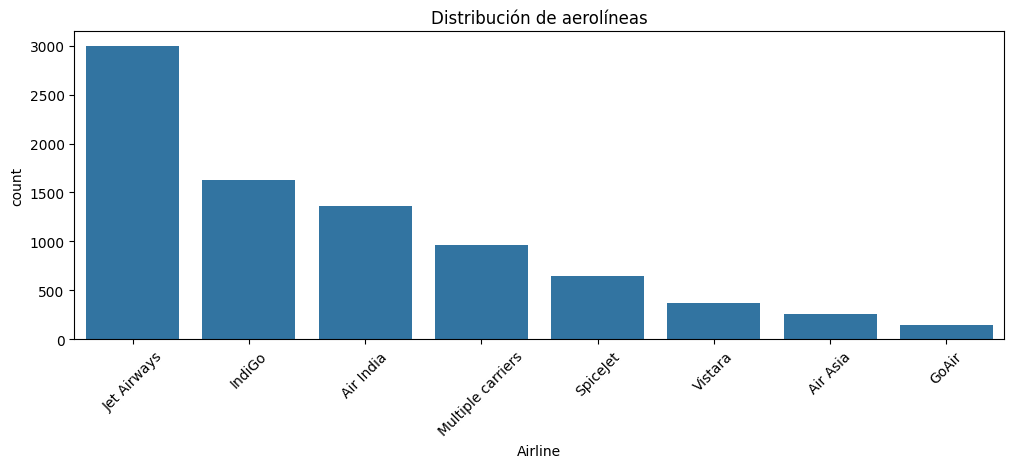

In [32]:
# Se grafica la distribución de aerolíneas (Airline)
# La distribución de aerolíneas muestra un fuerte predominio de Jet Airways,
# seguida por IndiGo y Air India.
# Otras aerolíneas como SpiceJet, Vistara y Air Asia tienen menor participación,
# mientras que Trujet aparece con muy pocos registros.
plt.figure(figsize=(12,4))
sns.countplot(data=planes, x="Airline", order=planes["Airline"].value_counts().index)
plt.title("Distribución de aerolíneas")
plt.xticks(rotation=45)
plt.show()

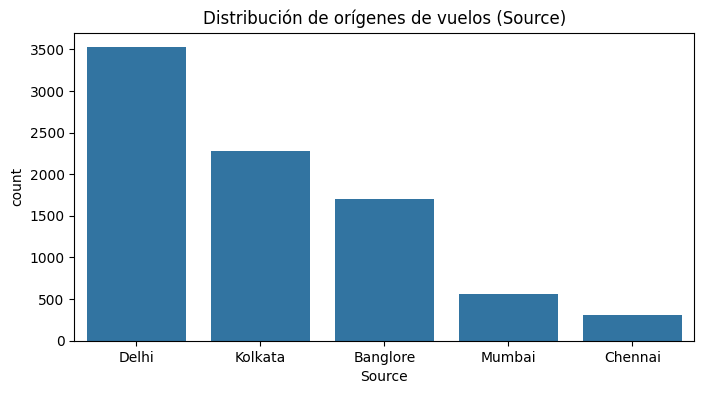

In [33]:
# Se grafica la distribución de orígenes (Source).
# Predominan los vuelos que parten desde Delhi,
# mientras que Bangalore, Kolkata y otras ciudades tienen menor frecuencia.
plt.figure(figsize=(8,4))
sns.countplot(data=planes, x="Source", order=planes["Source"].value_counts().index)
plt.title("Distribución de orígenes de vuelos (Source)")
plt.show()

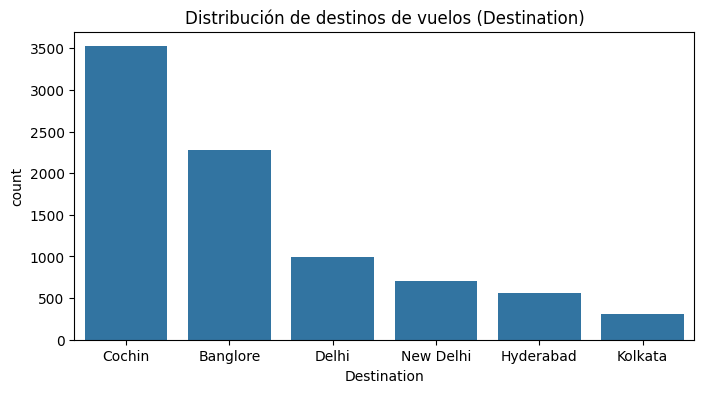

In [34]:
# Se grafica la distribución de destinos (Destination).
# Cochin aparece como el destino más frecuente,
# seguido por Bangalore y otras ciudades con menor volumen.
plt.figure(figsize=(8,4))
sns.countplot(data=planes, x="Destination", order=planes["Destination"].value_counts().index)
plt.title("Distribución de destinos de vuelos (Destination)")
plt.show()

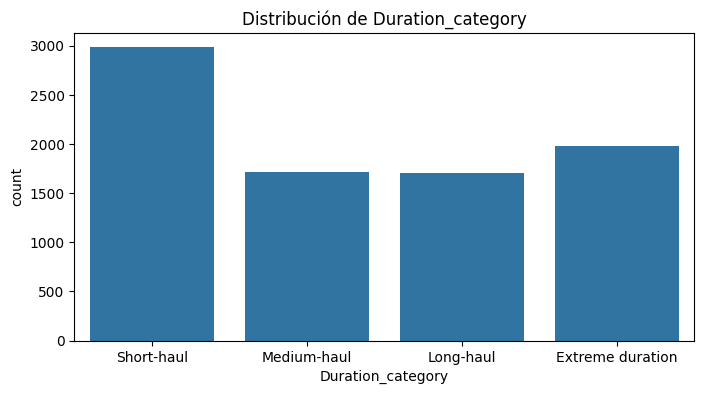

In [35]:
# Se grafica la distribución en Duration_category
# La distribución de Duration_category confirma lo observado en Duration_minutes:
# - Predominan los vuelos cortos (Short-haul, < 5h).
# - Medium-haul y Long-haul tienen frecuencias similares, bastante menores.
# - Se mantiene una proporción considerable de vuelos con duraciones extremas,
#   que reflejan los outliers ya detectados en el histograma numérico.
plt.figure(figsize=(8,4))
order = ["Short-haul", "Medium-haul", "Long-haul", "Extreme duration"]
sns.countplot(data=planes, x="Duration_category", order=order)
plt.title("Distribución de Duration_category")
plt.show()

### 4.3 Agregaciones descriptivas
- Estadísticas por aerolínea: precio promedio, desviación estándar, mediana de duración
- Comparaciones básicas entre categorías

                           mean          std
Airline                                     
Jet Airways        11569.391522  4194.725687
Multiple carriers  10824.679875  3558.323763
Air India           9479.545355  3713.220954
Vistara             7928.929333  2889.867722
IndiGo              5687.000000  2248.521651
GoAir               5671.710884  2764.926625
Air Asia            5609.719231  1979.826234
SpiceJet            4283.966206  1801.594015


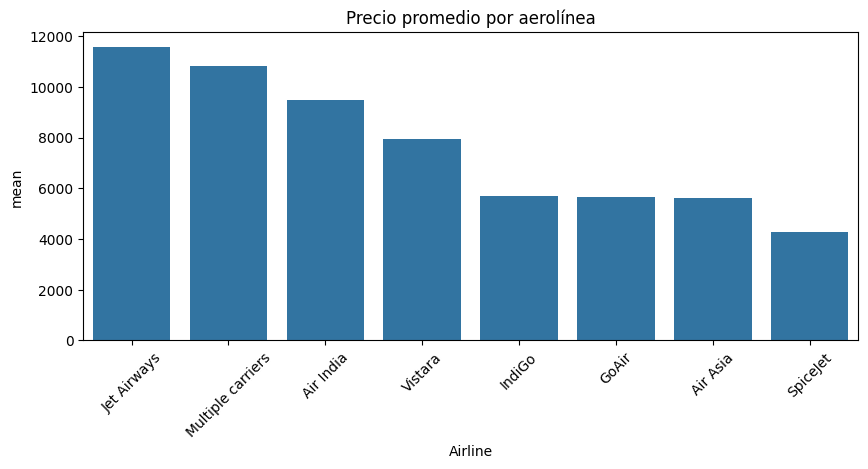

In [36]:
# Se calcula el precio promedio y la desviación estándar por aerolínea.
# Jet Airways aparece con precios más altos, mientras que Air Asia y SpiceJet
# operan con tarifas más bajas y menor dispersión.
price_stats = planes.groupby("Airline")["Price"].agg(["mean", "std"]).sort_values("mean", ascending=False)
print(price_stats)

plt.figure(figsize=(10,4))
sns.barplot(x=price_stats.index, y=price_stats["mean"])
plt.xticks(rotation=45)
plt.title("Precio promedio por aerolínea")
plt.show()

Airline
Air India            920.0
Jet Airways          800.0
Multiple carriers    615.0
Vistara              190.0
GoAir                175.0
IndiGo               175.0
Air Asia             170.0
SpiceJet             150.0
Name: Duration_minutes, dtype: float64


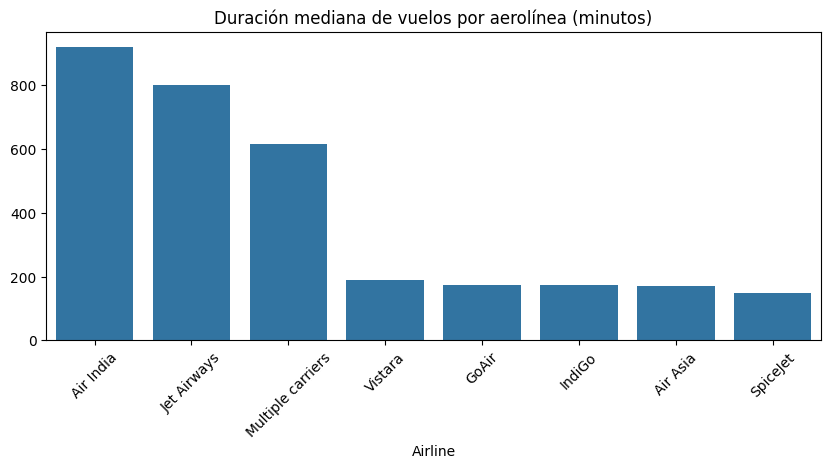

In [37]:
# Se calcula la duración mediana de los vuelos por aerolínea.
# Compañías como Jet Airways y Air India concentran vuelos más largos,
# mientras que aerolíneas low-cost (Air Asia, SpiceJet) muestran duraciones más cortas.
duration_stats = planes.groupby("Airline")["Duration_minutes"].median().sort_values(ascending=False)
print(duration_stats)

plt.figure(figsize=(10,4))
sns.barplot(x=duration_stats.index, y=duration_stats.values)
plt.xticks(rotation=45)
plt.title("Duración mediana de vuelos por aerolínea (minutos)")
plt.show()

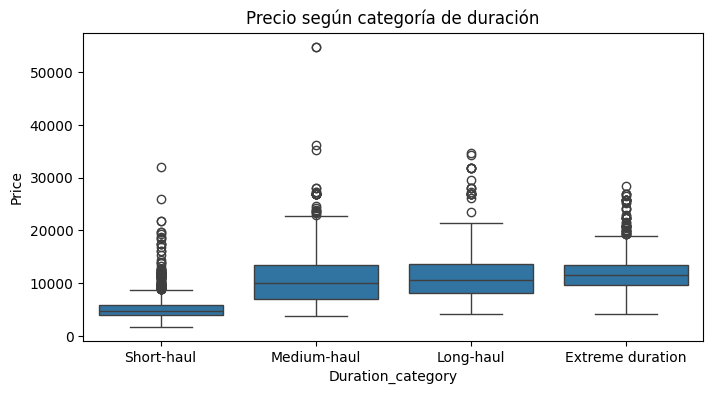

In [38]:
# Comparación de precios según la categoría de duración.
# Los vuelos más largos presentan, en promedio, precios más altos,
# aunque también con gran dispersión.
plt.figure(figsize=(8,4))
sns.boxplot(data=planes, x="Duration_category", y="Price", order=["Short-haul","Medium-haul","Long-haul","Extreme duration"])
plt.title("Precio según categoría de duración")
plt.show()

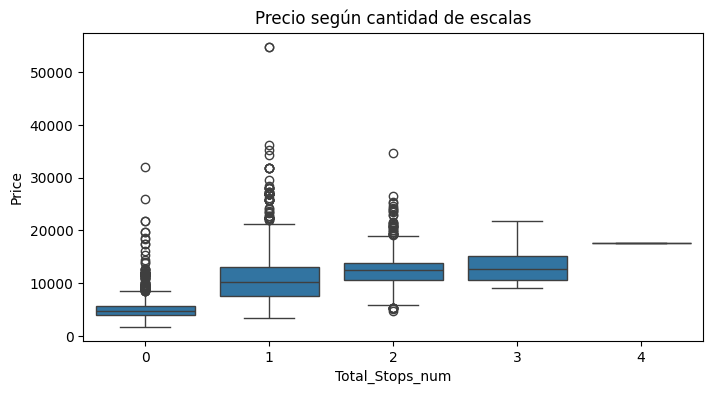

In [39]:
# Comparación de precios según la cantidad de escalas.
# Se observa un patrón de incremento de precios en vuelos con más escalas,
# aunque con solapamiento en algunas categorías.
plt.figure(figsize=(8,4))
sns.boxplot(data=planes, x="Total_Stops_num", y="Price")
plt.title("Precio según cantidad de escalas")
plt.show()

### Resumen de hallazgos (EDA univariado)

- **Precio (Price):** concentrado entre 5.000 y 15.000, con numerosos outliers por encima de 20.000.  
- **Duración (Duration_minutes):** predominan vuelos cortos (< 5h), aunque se detecta un grupo no menor de vuelos extremos (> 15h).  
- **Escalas (Total_Stops_num):** la mayoría de vuelos tiene 1 escala; los sin escalas son menos frecuentes.  
- **Aerolíneas:** Jet Airways domina en frecuencia y presenta precios más altos; Air Asia y SpiceJet muestran precios más bajos y vuelos más cortos.  
- **Origen y destino:** Delhi es el origen principal y Cochin el destino más frecuente.  
- **Comparaciones:** precios tienden a aumentar con la duración y el número de escalas, aunque con fuerte dispersión.  

## 5. EDA bivariado / multivariado

En esta sección se analizan relaciones entre variables para identificar patrones conjuntos,
posibles correlaciones y diferencias entre grupos.

### 5.1 Numérica vs numérica
- Relación entre `Price` y `Duration_minutes`
- Relación entre `Price` y `Total_Stops_num`
- Matriz de correlación para variables numéricas

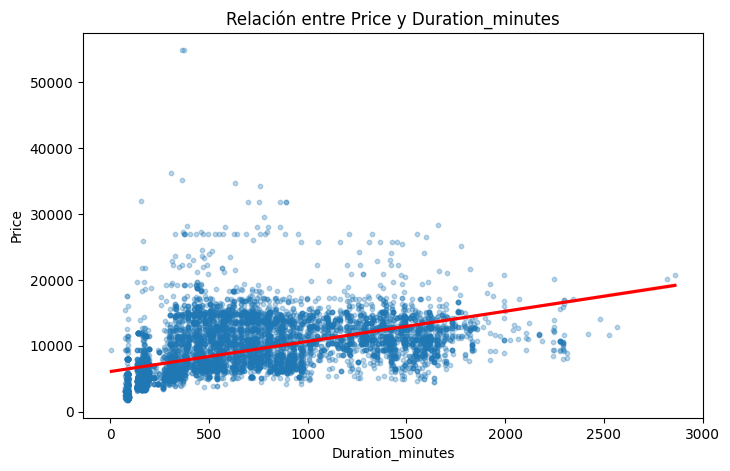

In [40]:
# Se grafica la relación entre Price y Duration_minutes.
# Se observa una tendencia general al aumento de precios en vuelos más largos,
# aunque con gran dispersión y outliers que superan los 20.000.
plt.figure(figsize=(8,5))
sns.regplot(data=planes, x="Duration_minutes", y="Price",
            scatter_kws={'alpha':0.3, 's':10}, line_kws={'color':'red'})
plt.title("Relación entre Price y Duration_minutes")
plt.show()

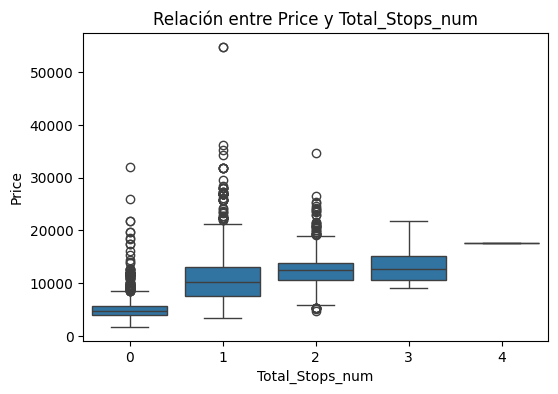

In [41]:
# Se grafica la relación entre Price y Total_Stops_num.
# Aunque se aprecia un aumento promedio del precio en vuelos con más escalas,
# existe un fuerte solapamiento entre categorías.
plt.figure(figsize=(6,4))
sns.boxplot(data=planes, x="Total_Stops_num", y="Price")
plt.title("Relación entre Price y Total_Stops_num")
plt.show()

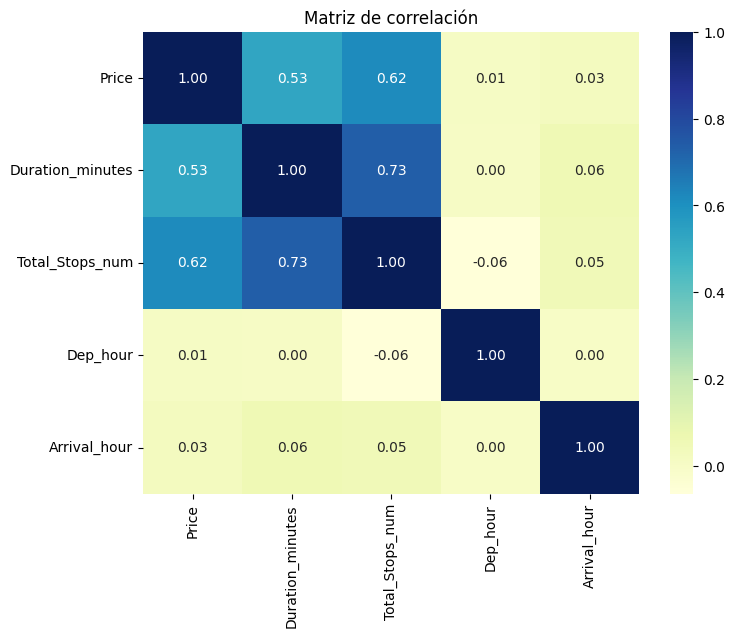

In [42]:
# Se calcula y grafica la correlación entre variables numéricas del dataset.
# La matriz de correlación muestra:
# - Fuerte relación positiva entre Duration_minutes y Total_Stops_num (0.73).
# - Correlación positiva entre Price y Total_Stops_num (0.62), y entre Price y Duration_minutes (0.53).
# - Variables horarias (Dep_hour, Arrival_hour) no muestran correlaciones significativas con Price ni con duración.
plt.figure(figsize=(8,6))
corr = planes[["Price","Duration_minutes","Total_Stops_num","Dep_hour","Arrival_hour"]].corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

### 5.2 Categórica vs numérica
- Comparación de `Price` según `Airline`
- Comparación de `Price` según `Duration_category`
- Comparación de `Price` según `Source` y `Destination`

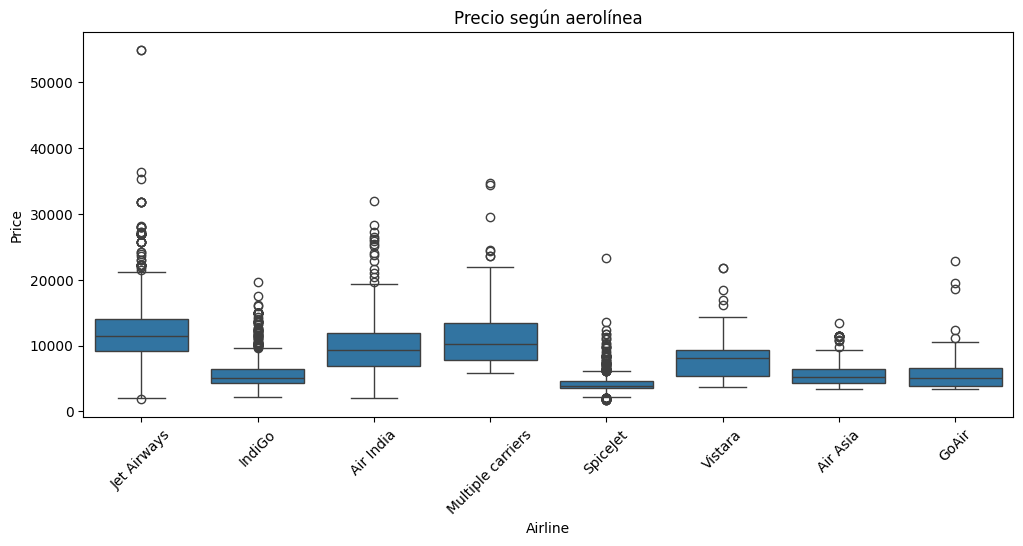

In [43]:
# Se compara la distribución de Price según aerolínea.
# Jet Airways presenta precios más elevados en promedio,
# mientras que Air Asia y SpiceJet operan con tarifas más bajas.
plt.figure(figsize=(12,5))
sns.boxplot(data=planes, x="Airline", y="Price", order=planes["Airline"].value_counts().index)
plt.title("Precio según aerolínea")
plt.xticks(rotation=45)
plt.show()

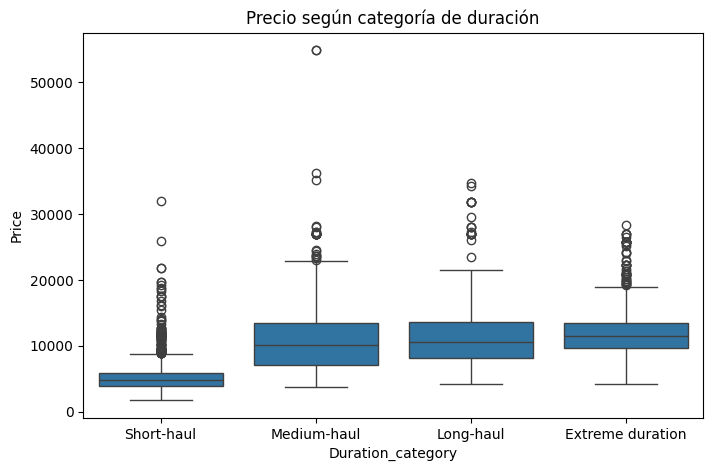

In [44]:
# Se compara el Price según la categoría de duración del vuelo.
# Los vuelos cortos (Short-haul) se destacan por precios más bajos y menor dispersión.
# En cambio, Medium-haul, Long-haul y Extreme duration presentan medianas similares
# y gran solapamiento en los rangos de precios, sin diferencias claras entre ellas.
plt.figure(figsize=(8,5))
order = ["Short-haul","Medium-haul","Long-haul","Extreme duration"]
sns.boxplot(data=planes, x="Duration_category", y="Price", order=order)
plt.title("Precio según categoría de duración")
plt.show()

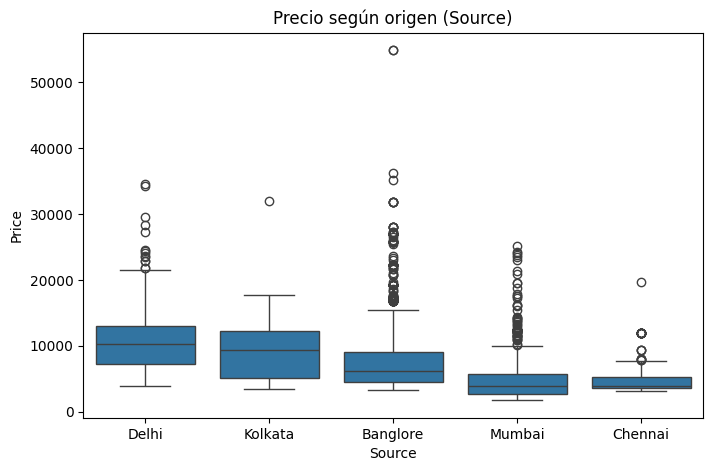

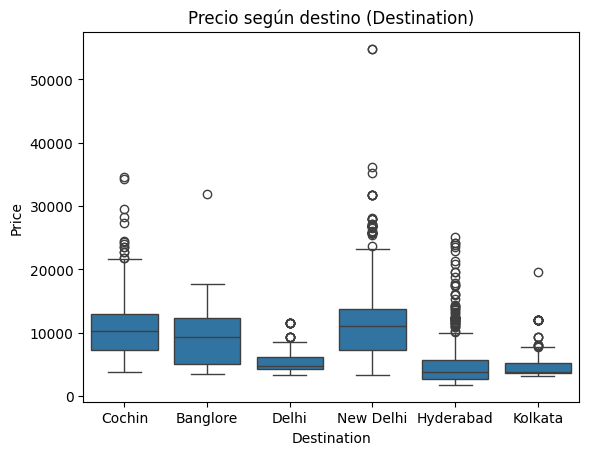

In [45]:
# Se comparan precios según el aeropuerto de origen (Source).
# Delhi y Kolkata presentan precios medianos más altos y consistentes.
# Mumbai y Bangalore muestran mayor dispersión y presencia de outliers en precios elevados.
# Chennai concentra los precios más bajos y con menor variabilidad
plt.figure(figsize=(8,5))
sns.boxplot(data=planes, x="Source", y="Price", order=planes["Source"].value_counts().index)
plt.title("Precio según origen (Source)")
plt.show()


# Se comparan precios según el aeropuerto de destino (Destination).
# New Delhi e Hyderabad muestran la mayor dispersión y presencia de outliers en precios altos.
# Cochin concentra muchos registros con valores intermedios.
# Delhi, Kolkata y Bangalore presentan distribuciones más acotadas y medianas más bajas.
sns.boxplot(data=planes, x="Destination", y="Price", order=planes["Destination"].value_counts().index)
plt.title("Precio según destino (Destination)")
plt.show()

### 5.3 Categórica vs categórica
- Tablas de contingencia (ej. `Airline` vs `Duration_category`)
- Heatmap de frecuencias cruzadas

In [46]:
# Se crea una tabla de contingencia entre aerolínea y categoría de duración.
# Permite identificar qué compañías concentran vuelos cortos, medianos o largos.
airline_duration = pd.crosstab(planes["Airline"], planes["Duration_category"])
print(airline_duration)

Duration_category  Extreme duration  Long-haul  Medium-haul  Short-haul
Airline                                                                
Air Asia                          0         65           35         160
Air India                       665        242          111         349
GoAir                             0          0           70          77
IndiGo                           26        159          333        1107
Jet Airways                    1184        673          626         513
Multiple carriers                 0        504          455           0
SpiceJet                          0          0           77         574
Vistara                         103         57           11         204


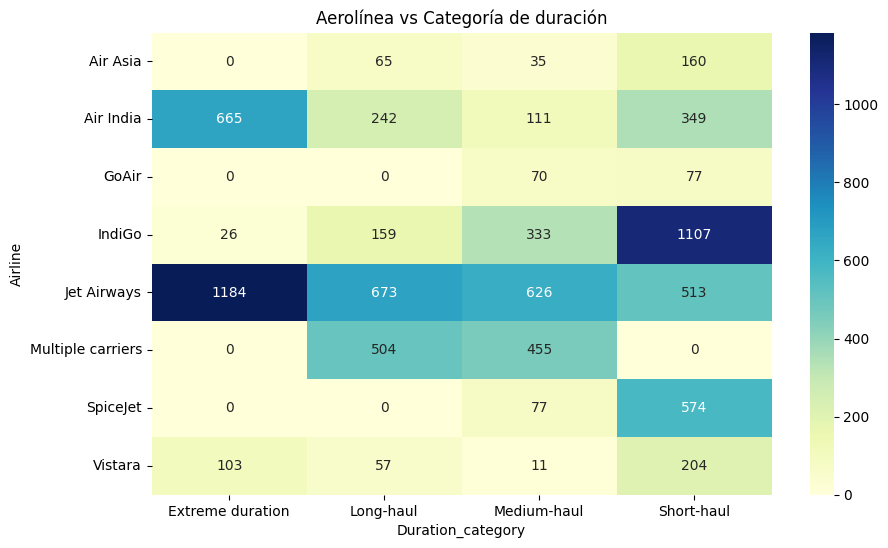

In [47]:
# Se grafica un heatmap a partir de la tabla de contingencia Airline vs Duration_category.
# Se observa, por ejemplo, que Jet Airways concentra gran parte de los vuelos largos,
# mientras que Air Asia y SpiceJet predominan en vuelos cortos.
plt.figure(figsize=(10,6))
sns.heatmap(airline_duration, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Aerolínea vs Categoría de duración")
plt.show()

### Resumen de hallazgos (EDA bivariado / multivariado)

- **Numérica vs numérica**  
  - Existe una correlación positiva entre la duración de los vuelos (`Duration_minutes`) y el precio (`Price`), aunque con alta dispersión.  
  - También se observa relación positiva entre el número de escalas (`Total_Stops_num`) y el precio.  
  - La matriz de correlación confirma estos vínculos:  
    - `Duration_minutes` y `Total_Stops_num`: correlación alta (0.73).  
    - `Price` y `Total_Stops_num`: correlación moderada (0.62).  
    - `Price` y `Duration_minutes`: correlación moderada (0.53).  
    - Las variables horarias (`Dep_hour`, `Arrival_hour`) no muestran correlaciones significativas.  

- **Categórica vs numérica**  
  - Jet Airways se destaca con precios más altos en promedio, mientras que Air Asia y SpiceJet se ubican en el extremo inferior.  
  - Los vuelos cortos (Short-haul) tienen precios claramente más bajos. En cambio, Medium-haul, Long-haul y Extreme duration muestran medianas similares y un fuerte solapamiento en los rangos de precios, sin diferencias marcadas entre sí.
  - Por origen y destino, Delhi y Kolkata concentran precios medianos más altos, mientras que Chennai se caracteriza por tarifas más bajas y acotadas.  

- **Categórica vs categórica**  
  - La tabla de contingencia y el heatmap muestran que:  
    - Jet Airways concentra una alta proporción de vuelos largos.  
    - Air Asia y SpiceJet predominan en vuelos cortos.  
    - Otras aerolíneas presentan una distribución más equilibrada entre categorías.  

En conjunto, el análisis confirma que el **precio de los vuelos está influenciado principalmente por la duración y el número de escalas**, con diferencias relevantes entre aerolíneas y rutas específicas.
